## Import CSV Data

In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pysqldf = lambda q: sqldf(q, globals())

In [2]:
# Read CSV
df = pd.read_csv('Senior Data Analyst (Growth) Case Study Dataset (1).csv')

# Change to Datetime
df['CUSTOMER_SIGN_UP_DATE'] = pd.to_datetime(df['CUSTOMER_SIGN_UP_DATE'])
df['LOAN_DISBURSAL_DATE_LCL_TS'] = pd.to_datetime(df['LOAN_DISBURSAL_DATE_LCL_TS'])

df.head()

,CUSTOMER_ID,CUSTOMER_SIGN_UP_DATE,CUSTOMER_COMPANY_DISTRICT,CUSTOMER_AGE,CUSTOMER_COMPANY_SIZE,CUSTOMER_ACQUISITION_SOURCE,CUSTOMER_INDUSTRY,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,LOAN_ID,LOAN_PRODUCT_NAME,LOAN_DISBURSAL_USD_AMT,LOAN_DISBURSAL_DATE_LCL_TS
0,000b67617af0675e5be42236d24d005d,2022-11-14,KULIM,38,Small,Organic,Construction,6595.54,0,23c93eeecba205e680bb3e6d56ed7e6bSG,TERM_LOAN,7824.71,2022-12-06
1,0016236509d72691faa8981ea7c7b5f3,2021-11-30,KUALA LIPIS,34,Small,Digital Marketing,Construction,11339.18,0,316bbc640ee5bc3bbc8f7f3e04ecae9fSG,TERM_LOAN,7824.71,2022-04-20
2,0016236509d72691faa8981ea7c7b5f3,2021-11-30,KUALA LIPIS,34,Small,Digital Marketing,Construction,11339.18,0,9b2f4bbf0ad00ded223258361620d382SG,TERM_LOAN,7824.71,2022-11-21
3,002c649950ed638c67a559ea7f6eef2a,2022-03-30,PUCHONG,49,Small,Organic,F&B,1994.15,1,04c9808b697fcadbe9ba15da7a65ec8fSG,TERM_LOAN,2503.91,2022-04-11
4,003594837231182c169bb55af0e0ab02,2018-04-16,SEMENYIH,34,Micro,Organic,Other Service Activities,639.58,0,00262452139718cfdc90eb7119d9fc8dSG,TERM_LOAN,1564.94,2019-12-11


In [3]:
# Check dtypes
df.dtypes

CUSTOMER_ID                                    object
CUSTOMER_SIGN_UP_DATE                  datetime64[ns]
CUSTOMER_COMPANY_DISTRICT                      object
CUSTOMER_AGE                                    int64
CUSTOMER_COMPANY_SIZE                          object
CUSTOMER_ACQUISITION_SOURCE                    object
CUSTOMER_INDUSTRY                              object
CUSTOMER_REVENUE_USD_AMT                      float64
CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT             int64
LOAN_ID                                        object
LOAN_PRODUCT_NAME                              object
LOAN_DISBURSAL_USD_AMT                        float64
LOAN_DISBURSAL_DATE_LCL_TS             datetime64[ns]
dtype: object

In [4]:
# Get desc stats
df.describe()

,CUSTOMER_AGE,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,LOAN_DISBURSAL_USD_AMT
count,6879.000000,6879.000000,6879.000000,6879.000000
mean,-10.391045,14674.336327,0.236226,10507.120670
std,3330.581024,18284.857112,0.473357,10521.642971
min,-273731.000000,84.770000,0.000000,468.930000
25%,31.000000,3284.625000,0.000000,3129.880000
50%,36.000000,7778.610000,0.000000,7230.030000
75%,41.000000,18779.950000,0.000000,15405.280000
max,1933.000000,152207.580000,3.000000,68857.420000


## Clean and Preprocess Data

In [5]:
# Check how many are null value
df.isnull().sum()

CUSTOMER_ID                              0
CUSTOMER_SIGN_UP_DATE                    0
CUSTOMER_COMPANY_DISTRICT              156
CUSTOMER_AGE                             0
CUSTOMER_COMPANY_SIZE                    0
CUSTOMER_ACQUISITION_SOURCE            338
CUSTOMER_INDUSTRY                        0
CUSTOMER_REVENUE_USD_AMT                 0
CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT      0
LOAN_ID                                  0
LOAN_PRODUCT_NAME                        0
LOAN_DISBURSAL_USD_AMT                   0
LOAN_DISBURSAL_DATE_LCL_TS               0
dtype: int64

In [6]:
# Map district name typos to correct district names
district = {'ALOR SETAR,': 'ALOR SETAR',
'Ampang': 'AMPANG',
'Balik Pulau': 'BALIK PULAU',
'Bukit Mertajam': 'BUKIT MERTAJAM',
'BUKTI MERTAJAM': 'BUKIT MERTAJAM',
'DESA PARK CITY': 'DESA PARKCITY',
'GEORGE TOWN': 'GEORGETOWN',
'Hutan Melintang': 'HUTAN MELINTANG',
'Kedah': 'KEDAH',
'Kepala Batas': 'KEPALA BATAS',
'KL': 'KUALA LUMPUR',
'W. PERSEKUTUAN (KL)': 'KUALA LUMPUR',
'KUALA TERENGGANU,': 'KUALA TERENGGANU',
'.': None,
'S': None,
'#NAME?': None,
'PADANG JAMBU,': 'PADANG JAMBU',
'Penang': 'PENANG',
'Senai': 'SENAI',
'Seri Medan': 'SERI MEDAN',
'Sg Petani': 'SG PETANI',
'TANJUNG MALIM': 'TANJONG MALIM',
'TG. MALIM': 'TANJONG MALIM',
'TANJUNG SEPAT': 'TANJONG SEPAT',
'TASEK GELUGUR': 'TASEK GELUGOR',
'TELUK PANGLIMA GARANG': 'TELOK PANGLIMA GARANG',
'TLK PANGLIMA GARANG': 'TELOK PANGLIMA GARANG'}

In [7]:
def replace_text_dict(df, district):
  df.replace(to_replace=district, inplace=True)
  return df

df = replace_text_dict(df.copy(), district.copy())
df.head()

,CUSTOMER_ID,CUSTOMER_SIGN_UP_DATE,CUSTOMER_COMPANY_DISTRICT,CUSTOMER_AGE,CUSTOMER_COMPANY_SIZE,CUSTOMER_ACQUISITION_SOURCE,CUSTOMER_INDUSTRY,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,LOAN_ID,LOAN_PRODUCT_NAME,LOAN_DISBURSAL_USD_AMT,LOAN_DISBURSAL_DATE_LCL_TS
0,000b67617af0675e5be42236d24d005d,2022-11-14,KULIM,38,Small,Organic,Construction,6595.54,0,23c93eeecba205e680bb3e6d56ed7e6bSG,TERM_LOAN,7824.71,2022-12-06
1,0016236509d72691faa8981ea7c7b5f3,2021-11-30,KUALA LIPIS,34,Small,Digital Marketing,Construction,11339.18,0,316bbc640ee5bc3bbc8f7f3e04ecae9fSG,TERM_LOAN,7824.71,2022-04-20
2,0016236509d72691faa8981ea7c7b5f3,2021-11-30,KUALA LIPIS,34,Small,Digital Marketing,Construction,11339.18,0,9b2f4bbf0ad00ded223258361620d382SG,TERM_LOAN,7824.71,2022-11-21
3,002c649950ed638c67a559ea7f6eef2a,2022-03-30,PUCHONG,49,Small,Organic,F&B,1994.15,1,04c9808b697fcadbe9ba15da7a65ec8fSG,TERM_LOAN,2503.91,2022-04-11
4,003594837231182c169bb55af0e0ab02,2018-04-16,SEMENYIH,34,Micro,Organic,Other Service Activities,639.58,0,00262452139718cfdc90eb7119d9fc8dSG,TERM_LOAN,1564.94,2019-12-11


In [8]:
# Check how many are null value after cleaning
df.isnull().sum()

CUSTOMER_ID                              0
CUSTOMER_SIGN_UP_DATE                    0
CUSTOMER_COMPANY_DISTRICT              159
CUSTOMER_AGE                             0
CUSTOMER_COMPANY_SIZE                    0
CUSTOMER_ACQUISITION_SOURCE            338
CUSTOMER_INDUSTRY                        0
CUSTOMER_REVENUE_USD_AMT                 0
CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT      0
LOAN_ID                                  0
LOAN_PRODUCT_NAME                        0
LOAN_DISBURSAL_USD_AMT                   0
LOAN_DISBURSAL_DATE_LCL_TS               0
dtype: int64

In [9]:
# Drop those with nulls

df1 = df.dropna()
df1.head()

,CUSTOMER_ID,CUSTOMER_SIGN_UP_DATE,CUSTOMER_COMPANY_DISTRICT,CUSTOMER_AGE,CUSTOMER_COMPANY_SIZE,CUSTOMER_ACQUISITION_SOURCE,CUSTOMER_INDUSTRY,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,LOAN_ID,LOAN_PRODUCT_NAME,LOAN_DISBURSAL_USD_AMT,LOAN_DISBURSAL_DATE_LCL_TS
0,000b67617af0675e5be42236d24d005d,2022-11-14,KULIM,38,Small,Organic,Construction,6595.54,0,23c93eeecba205e680bb3e6d56ed7e6bSG,TERM_LOAN,7824.71,2022-12-06
1,0016236509d72691faa8981ea7c7b5f3,2021-11-30,KUALA LIPIS,34,Small,Digital Marketing,Construction,11339.18,0,316bbc640ee5bc3bbc8f7f3e04ecae9fSG,TERM_LOAN,7824.71,2022-04-20
2,0016236509d72691faa8981ea7c7b5f3,2021-11-30,KUALA LIPIS,34,Small,Digital Marketing,Construction,11339.18,0,9b2f4bbf0ad00ded223258361620d382SG,TERM_LOAN,7824.71,2022-11-21
3,002c649950ed638c67a559ea7f6eef2a,2022-03-30,PUCHONG,49,Small,Organic,F&B,1994.15,1,04c9808b697fcadbe9ba15da7a65ec8fSG,TERM_LOAN,2503.91,2022-04-11
4,003594837231182c169bb55af0e0ab02,2018-04-16,SEMENYIH,34,Micro,Organic,Other Service Activities,639.58,0,00262452139718cfdc90eb7119d9fc8dSG,TERM_LOAN,1564.94,2019-12-11


In [10]:
df1.shape

(6465, 13)

In [11]:
# Check how many are null value after cleaning
df1.isnull().sum()

CUSTOMER_ID                            0
CUSTOMER_SIGN_UP_DATE                  0
CUSTOMER_COMPANY_DISTRICT              0
CUSTOMER_AGE                           0
CUSTOMER_COMPANY_SIZE                  0
CUSTOMER_ACQUISITION_SOURCE            0
CUSTOMER_INDUSTRY                      0
CUSTOMER_REVENUE_USD_AMT               0
CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT    0
LOAN_ID                                0
LOAN_PRODUCT_NAME                      0
LOAN_DISBURSAL_USD_AMT                 0
LOAN_DISBURSAL_DATE_LCL_TS             0
dtype: int64

Assumption made: for customers with multiple acquisition source, I am taking the source where the loan disbursal date is earlier.

In [12]:
# Customer Data Table

q = """
with t1 as (
SELECT CUSTOMER_ID,
CUSTOMER_SIGN_UP_DATE,
CUSTOMER_COMPANY_DISTRICT,
CUSTOMER_AGE,
CUSTOMER_COMPANY_SIZE,
CUSTOMER_INDUSTRY,
avg(CUSTOMER_REVENUE_USD_AMT) as CUSTOMER_REVENUE_USD_AMT,
max(CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT) as CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,
sum(case when LOAN_PRODUCT_NAME='TERM_LOAN' then 1 else 0 end) as TERM_LOAN_COUNT,
sum(case when LOAN_PRODUCT_NAME='Credit Line' then 1 else 0 end) as CREDIT_LINE_COUNT,
avg(LOAN_DISBURSAL_USD_AMT) as AVERAGE_LOAN_DISBURSAL_USD_AMOUNT,
min(LOAN_DISBURSAL_DATE_LCL_TS) as FIRST_LOAN_DISBURSAL_DATE_LCL_TS
FROM df1
group by 1,2,3,4,5,6
),
t_acq as 
(
select CUSTOMER_ID,
CUSTOMER_ACQUISITION_SOURCE,
ROW_NUMBER() OVER(PARTITION BY CUSTOMER_ID ORDER BY LOAN_DISBURSAL_DATE_LCL_TS asc) as rank
from df1
),
t_acq_2 as (
select CUSTOMER_ID,
CUSTOMER_ACQUISITION_SOURCE 
from t_acq
where rank=1
),
t3 as (
select t1.*, t2.CUSTOMER_ACQUISITION_SOURCE
from t1 join t_acq_2 t2 using(CUSTOMER_ID)
)
select *
, JULIANDAY(FIRST_LOAN_DISBURSAL_DATE_LCL_TS) - JULIANDAY(CUSTOMER_SIGN_UP_DATE) as DAYS_FROM_SIGNUP_TO_FIRST_LOAN
, strftime('%Y', CUSTOMER_SIGN_UP_DATE) AS YEAR_JOINED
, case 
when CUSTOMER_AGE<25 then '18-24 yo'
when CUSTOMER_AGE<35 then '25-34 yo'
when CUSTOMER_AGE<45 then '35-44 yo'
when CUSTOMER_AGE<55 then '45-54 yo'
when CUSTOMER_AGE<65 then '55-64 yo'
when CUSTOMER_AGE>64 then '65+ yo'
end as CUSTOMER_AGE_GROUP
from t3
where CUSTOMER_AGE>17 and CUSTOMER_AGE<100
"""

df_customer_data = pysqldf(q)

In [13]:
df_customer_data = df_customer_data.set_index('CUSTOMER_ID', inplace=False)
df_customer_data.head()

,CUSTOMER_SIGN_UP_DATE,CUSTOMER_COMPANY_DISTRICT,CUSTOMER_AGE,CUSTOMER_COMPANY_SIZE,CUSTOMER_INDUSTRY,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,TERM_LOAN_COUNT,CREDIT_LINE_COUNT,AVERAGE_LOAN_DISBURSAL_USD_AMOUNT,FIRST_LOAN_DISBURSAL_DATE_LCL_TS,CUSTOMER_ACQUISITION_SOURCE,DAYS_FROM_SIGNUP_TO_FIRST_LOAN,YEAR_JOINED,CUSTOMER_AGE_GROUP
CUSTOMER_ID,,,,,,,,,,,,,,,
000b67617af0675e5be42236d24d005d,2022-11-14 00:00:00.000000,KULIM,38,Small,Construction,6595.54,0,1,0,7824.71,2022-12-06 00:00:00.000000,Organic,22.0,2022,35-44 yo
0016236509d72691faa8981ea7c7b5f3,2021-11-30 00:00:00.000000,KUALA LIPIS,34,Small,Construction,11339.18,0,2,0,7824.71,2022-04-20 00:00:00.000000,Digital Marketing,141.0,2021,25-34 yo
002c649950ed638c67a559ea7f6eef2a,2022-03-30 00:00:00.000000,PUCHONG,49,Small,F&B,1994.15,1,1,0,2503.91,2022-04-11 00:00:00.000000,Organic,12.0,2022,45-54 yo
003594837231182c169bb55af0e0ab02,2018-04-16 00:00:00.000000,SEMENYIH,34,Micro,Other Service Activities,639.58,0,1,0,1564.94,2019-12-11 00:00:00.000000,Organic,604.0,2018,25-34 yo
0046e9da138cdf1bbf5622633a28d9b4,2022-11-21 00:00:00.000000,BAYAN LEPAS,50,Small,F&B,1365.46,0,1,0,1564.94,2022-11-29 00:00:00.000000,Platform Partners,8.0,2022,45-54 yo


In [14]:
df_customer_data.shape

(3604, 15)

In [15]:
df_customer_data.head()

,CUSTOMER_SIGN_UP_DATE,CUSTOMER_COMPANY_DISTRICT,CUSTOMER_AGE,CUSTOMER_COMPANY_SIZE,CUSTOMER_INDUSTRY,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,TERM_LOAN_COUNT,CREDIT_LINE_COUNT,AVERAGE_LOAN_DISBURSAL_USD_AMOUNT,FIRST_LOAN_DISBURSAL_DATE_LCL_TS,CUSTOMER_ACQUISITION_SOURCE,DAYS_FROM_SIGNUP_TO_FIRST_LOAN,YEAR_JOINED,CUSTOMER_AGE_GROUP
CUSTOMER_ID,,,,,,,,,,,,,,,
000b67617af0675e5be42236d24d005d,2022-11-14 00:00:00.000000,KULIM,38,Small,Construction,6595.54,0,1,0,7824.71,2022-12-06 00:00:00.000000,Organic,22.0,2022,35-44 yo
0016236509d72691faa8981ea7c7b5f3,2021-11-30 00:00:00.000000,KUALA LIPIS,34,Small,Construction,11339.18,0,2,0,7824.71,2022-04-20 00:00:00.000000,Digital Marketing,141.0,2021,25-34 yo
002c649950ed638c67a559ea7f6eef2a,2022-03-30 00:00:00.000000,PUCHONG,49,Small,F&B,1994.15,1,1,0,2503.91,2022-04-11 00:00:00.000000,Organic,12.0,2022,45-54 yo
003594837231182c169bb55af0e0ab02,2018-04-16 00:00:00.000000,SEMENYIH,34,Micro,Other Service Activities,639.58,0,1,0,1564.94,2019-12-11 00:00:00.000000,Organic,604.0,2018,25-34 yo
0046e9da138cdf1bbf5622633a28d9b4,2022-11-21 00:00:00.000000,BAYAN LEPAS,50,Small,F&B,1365.46,0,1,0,1564.94,2022-11-29 00:00:00.000000,Platform Partners,8.0,2022,45-54 yo


In [16]:
df_customer_data.to_csv('customer_data.csv', index=False)

In [17]:
categorical_columns=['CUSTOMER_COMPANY_SIZE', 'CUSTOMER_INDUSTRY', 'CUSTOMER_ACQUISITION_SOURCE', 'YEAR_JOINED', 'CUSTOMER_AGE_GROUP']

# Assuming 'df' is your DataFrame and 'categorical_columns' is a list of categorical column names
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_customer_data[categorical_columns])

column_names = encoder.get_feature_names_out(categorical_columns)

encoded_df_customer_data = pd.DataFrame(encoded_data, columns=column_names)

encoded_df_customer_data.index = df_customer_data.index

# Combine the encoded categorical data with the remaining features (if any)
df_customer_data_encoded = pd.concat([df_customer_data.drop(categorical_columns, axis=1), encoded_df_customer_data], axis=1)

df_customer_data_encoded.index = df_customer_data.index

df_customer_data_encoded.head()

,CUSTOMER_SIGN_UP_DATE,CUSTOMER_COMPANY_DISTRICT,CUSTOMER_AGE,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,TERM_LOAN_COUNT,CREDIT_LINE_COUNT,AVERAGE_LOAN_DISBURSAL_USD_AMOUNT,FIRST_LOAN_DISBURSAL_DATE_LCL_TS,DAYS_FROM_SIGNUP_TO_FIRST_LOAN,...,YEAR_JOINED_2020,YEAR_JOINED_2021,YEAR_JOINED_2022,YEAR_JOINED_2023,CUSTOMER_AGE_GROUP_18-24 yo,CUSTOMER_AGE_GROUP_25-34 yo,CUSTOMER_AGE_GROUP_35-44 yo,CUSTOMER_AGE_GROUP_45-54 yo,CUSTOMER_AGE_GROUP_55-64 yo,CUSTOMER_AGE_GROUP_65+ yo
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
000b67617af0675e5be42236d24d005d,2022-11-14 00:00:00.000000,KULIM,38,6595.54,0,1,0,7824.71,2022-12-06 00:00:00.000000,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0016236509d72691faa8981ea7c7b5f3,2021-11-30 00:00:00.000000,KUALA LIPIS,34,11339.18,0,2,0,7824.71,2022-04-20 00:00:00.000000,141.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
002c649950ed638c67a559ea7f6eef2a,2022-03-30 00:00:00.000000,PUCHONG,49,1994.15,1,1,0,2503.91,2022-04-11 00:00:00.000000,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
003594837231182c169bb55af0e0ab02,2018-04-16 00:00:00.000000,SEMENYIH,34,639.58,0,1,0,1564.94,2019-12-11 00:00:00.000000,604.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0046e9da138cdf1bbf5622633a28d9b4,2022-11-21 00:00:00.000000,BAYAN LEPAS,50,1365.46,0,1,0,1564.94,2022-11-29 00:00:00.000000,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
df_customer_data_encoded_drop = df_customer_data_encoded.drop(
    ['CUSTOMER_SIGN_UP_DATE', 'CUSTOMER_COMPANY_DISTRICT','FIRST_LOAN_DISBURSAL_DATE_LCL_TS']
    , axis=1)

df_customer_data_encoded_drop.head()

,CUSTOMER_AGE,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,TERM_LOAN_COUNT,CREDIT_LINE_COUNT,AVERAGE_LOAN_DISBURSAL_USD_AMOUNT,DAYS_FROM_SIGNUP_TO_FIRST_LOAN,CUSTOMER_COMPANY_SIZE_Large,CUSTOMER_COMPANY_SIZE_Medium,CUSTOMER_COMPANY_SIZE_Micro,...,YEAR_JOINED_2020,YEAR_JOINED_2021,YEAR_JOINED_2022,YEAR_JOINED_2023,CUSTOMER_AGE_GROUP_18-24 yo,CUSTOMER_AGE_GROUP_25-34 yo,CUSTOMER_AGE_GROUP_35-44 yo,CUSTOMER_AGE_GROUP_45-54 yo,CUSTOMER_AGE_GROUP_55-64 yo,CUSTOMER_AGE_GROUP_65+ yo
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
000b67617af0675e5be42236d24d005d,38,6595.54,0,1,0,7824.71,22.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0016236509d72691faa8981ea7c7b5f3,34,11339.18,0,2,0,7824.71,141.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
002c649950ed638c67a559ea7f6eef2a,49,1994.15,1,1,0,2503.91,12.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
003594837231182c169bb55af0e0ab02,34,639.58,0,1,0,1564.94,604.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0046e9da138cdf1bbf5622633a28d9b4,50,1365.46,0,1,0,1564.94,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_customer_data_encoded_drop)

df_customer_data_encoded_drop_scaled = pd.DataFrame(scaled_data, columns=df_customer_data_encoded_drop.columns)

df_customer_data_encoded_drop_scaled.index = df_customer_data_encoded_drop.index

df_customer_data_encoded_drop_scaled.head()

,CUSTOMER_AGE,CUSTOMER_REVENUE_USD_AMT,CUSTOMER_TOTAL_LOAN_DEFAULTED_COUNT,TERM_LOAN_COUNT,CREDIT_LINE_COUNT,AVERAGE_LOAN_DISBURSAL_USD_AMOUNT,DAYS_FROM_SIGNUP_TO_FIRST_LOAN,CUSTOMER_COMPANY_SIZE_Large,CUSTOMER_COMPANY_SIZE_Medium,CUSTOMER_COMPANY_SIZE_Micro,...,YEAR_JOINED_2020,YEAR_JOINED_2021,YEAR_JOINED_2022,YEAR_JOINED_2023,CUSTOMER_AGE_GROUP_18-24 yo,CUSTOMER_AGE_GROUP_25-34 yo,CUSTOMER_AGE_GROUP_35-44 yo,CUSTOMER_AGE_GROUP_45-54 yo,CUSTOMER_AGE_GROUP_55-64 yo,CUSTOMER_AGE_GROUP_65+ yo
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
000b67617af0675e5be42236d24d005d,0.295082,0.042799,0.000000,0.111111,0.0,0.101383,0.009615,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0016236509d72691faa8981ea7c7b5f3,0.229508,0.073982,0.000000,0.222222,0.0,0.101383,0.066827,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
002c649950ed638c67a559ea7f6eef2a,0.475410,0.012552,0.333333,0.111111,0.0,0.023042,0.004808,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
003594837231182c169bb55af0e0ab02,0.229508,0.003647,0.000000,0.111111,0.0,0.009217,0.289423,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0046e9da138cdf1bbf5622633a28d9b4,0.491803,0.008419,0.000000,0.111111,0.0,0.009217,0.002885,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### K-Means Clustering

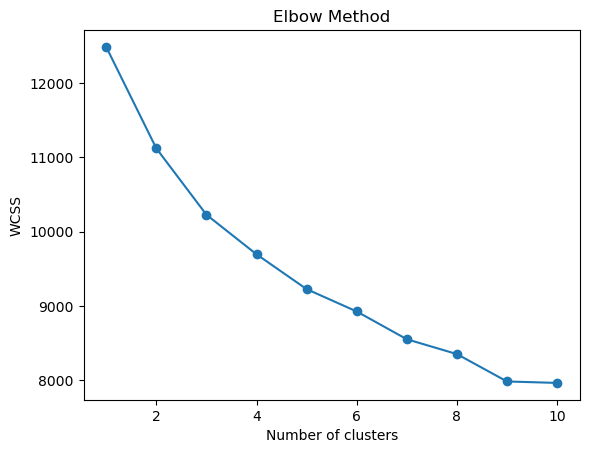

In [20]:
X = df_customer_data_encoded_drop_scaled.values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:

# Initialize KMeans
kmeans = KMeans(n_clusters=4)  # You can specify the number of clusters you want

# Fit KMeans to the scaled data
kmeans.fit(df_customer_data_encoded_index_drop_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df_customer_data['Cluster'] = cluster_labels

df_customer_data.head()

NameError: name 'df_customer_data_encoded_index_drop_scaled' is not defined

In [ ]:
df_customer_data.to_csv('customer_data_2.csv', index=True)